# Get Metadata

Prior to any form of upload or ingest of your data into **ndstore**, or likely almost any other operation, it is important to understand properties of the data you collected or were given. In fact, the metadata we describe the collection of here serve as necessary inputs for creating your dataset and project in the **ndstore** spatial database.

### Step 1: Access your data

Depending how your images are acquired they may exist on your harddrive in any number of formats, such as `.png`. `.tiff`, `.h5`, `.nii`, etc., and different tools should be used to access each of these differen types of data. In the case of our example data, which can be found [here](http://openconnecto.me/mrdata/share/ingest/s3ingest/demo_data.zip), we have a series of `.png` images. Each `.png` image represents a *z*-slice of 3D data, so the *x* and *y* dimensions of the images are preserved across files.

As our images are in `.png` format, we will be using `Python` and the `scipy` library. Here, we show how to load the first image in the stack. This assumes that we have downloaded the zip-file linked above and unzipped it in the `/tmp/` directory.

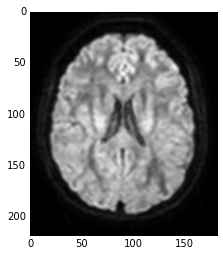

In [22]:
from scipy import misc as scm
import os.path as op
import matplotlib.pyplot as plt
% matplotlib inline

datadir = '/tmp/113_1/'
im = scm.imread(op.join(datadir,'0090.png'))

plt.imshow(im, cmap='gray')
plt.show()

### Step 2: Interogating your data

In order to create a dataset, project, and channels for your data, you need to record several details of your data. Some of them can be found by interogating these images as we're about to do, while others require insight into the data acquisition (such as resolution, for instance).

The details which can be determined from your image are:
  - {x, y, z} image size
  - time range
  - data type
  - window range

The details which require information about your particular data are:
  - dataset name (no spaces or special characters)
  - {x, y, z} offset
  - scaling levels
  - scaling option
  - {x, y, z} voxel resolution

A description of each of these fields is available [here](http://docs.neurodata.io/ndstore/sphinx/datamodel.html#dataset-attributes).

We can get this information from our image as follows:

In [14]:
import os
import numpy as np

files = os.listdir(datadir)  # get a list of all files in the dataset

print 'X image size: ', im.shape[1]  # second dimension is X in our png
print 'Y image size: ', im.shape[0]  # first dimension is Y in our png
print 'Z image size: ', len(files)  # we get Z by counting the number of images in our directory

print 'Time range: (0, 0)'  # default value if the data is not time series

dtype = im.dtype
print 'Data type: ', dtype

try:
    im_min = np.iinfo(dtype).max
    im_max = np.iinfo(dtype).min
except:
    im_min = np.finfo(dtype).max
    im_max = np.finfo(dtype).min


for f in files:  # get range by checking each slice min and max
    temp_im = scm.imread(op.join(datadir, f))  
    im_min = np.min(temp_im) if np.min(temp_im) < im_min else im_min  # update image stack min
    im_max = np.max(temp_im) if np.max(temp_im) > im_max else im_max  # update image stack max
print 'Window range: (%f, %f)' % (im_min, im_max)

X image size:  182
Y image size:  218
Z image size:  182
Time range: (0, 0)
Data type:  uint8
Window range: (0.000000, 255.000000)


Summarizing these results and those that require more intimate knowledge of the data, we come up with the following:

| property             | value          |
|:---------            |:------         |
| dataset name         | kki2009_demo   |
| x size               | 182            |
| y size               | 218            |
| z size               | 182            |
| time range           | (0, 0)         |
| data type            | uint8          |
| window range         | (0, 255)       |
| x offset             | 0              |
| y offset             | 0              |
| z offset             | 0              |
| scaling levels       | 0              |
| scaling option       | isotropic      |
| x voxel resolution   | 1 mm (1e^6 nm) |
| y voxel resolution   | 1 mm (1e^6 nm) |
| z voxel resolution   | 1 mm (1e^6 nm) |

### Step 3: Creating a Dataset

Now that you've interrogated your data, you can move on to the creating a dataset tutorial.